In [3]:
%matplotlib inline
import pandas as pd
import numpy as np

data_dir = 'data/'
names1880 = pd.read_csv(data_dir + 'names/yob1880.txt', names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [4]:
names1880.groupby('sex').births.sum()

sex
F     90992
M    110491
Name: births, dtype: int64

In [5]:
# 2010 is the last available year right now
years = range(1880, 2011)

columns = ['name', 'sex', 'births']

def load_year(year):
    path = data_dir + 'names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    return frame

pieces = map(load_year, years)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [6]:
total_births = names.pivot_table(values='births', index='year', columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1899166,2053065
2007,1920231,2072975
2008,1888177,2037309
2009,1834048,1980491
2010,1774186,1915331


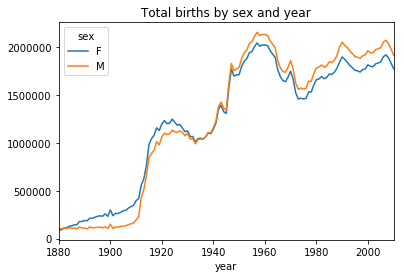

In [7]:
total_births.plot(title='Total births by sex and year')

In [8]:
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [9]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189


In [10]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [11]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

top1000 = names.groupby(['year', 'sex']).apply(get_top1000)
top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077644
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021310
         4     Minnie   F    1746  1880  0.019189

In [12]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']
total_births = top1000.pivot_table(values='births', index='year', columns='name', aggfunc=sum)
total_births.describe()

/Users/mmccarty/anaconda3/envs/py3/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
count,3.000000,17.000000,3.000000,131.000000,1.0,1.0,12.000000,1.0,33.000000,96.000000,...,8.000000,101.000000,16.000000,13.000000,63.000000,11.000000,63.000000,59.000000,54.000000,1.0
mean,891.000000,2868.647059,309.000000,4009.374046,227.0,6.0,272.083333,6.0,453.242424,180.322917,...,10.250000,770.623762,1786.687500,438.692308,78.380952,7.545455,52.555556,77.627119,67.648148,259.0
std,412.360279,1398.211310,114.590576,5195.072479,NaN,NaN,34.631720,NaN,140.169547,132.598999,...,2.915476,1595.786789,1516.502982,104.247610,50.507243,1.967925,28.405916,32.996812,24.366817,NaN
min,450.000000,831.000000,219.000000,69.000000,227.0,6.0,211.000000,6.0,176.000000,52.000000,...,6.000000,19.000000,219.000000,225.000000,7.000000,6.000000,8.000000,21.000000,21.000000,259.0
25%,703.000000,1451.000000,244.500000,360.000000,227.0,6.0,253.000000,6.0,349.000000,84.000000,...,8.000000,34.000000,541.750000,438.000000,47.500000,6.000000,28.000000,56.500000,53.500000,259.0
50%,956.000000,3456.000000,270.000000,682.000000,227.0,6.0,278.500000,6.0,430.000000,120.000000,...,10.000000,74.000000,1325.500000,493.000000,64.000000,7.000000,51.000000,66.000000,65.500000,259.0
75%,1111.500000,3955.000000,354.000000,8472.000000,227.0,6.0,297.250000,6.0,552.000000,251.750000,...,13.000000,202.000000,2894.750000,508.000000,113.500000,8.500000,77.500000,93.000000,82.250000,259.0
max,1267.000000,4778.000000,438.000000,15312.000000,227.0,6.0,321.000000,6.0,710.000000,536.000000,...,14.000000,6264.000000,5203.000000,531.000000,184.000000,11.000000,107.000000,169.000000,127.000000,259.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x118b0afd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11943f978>], dtype=object)

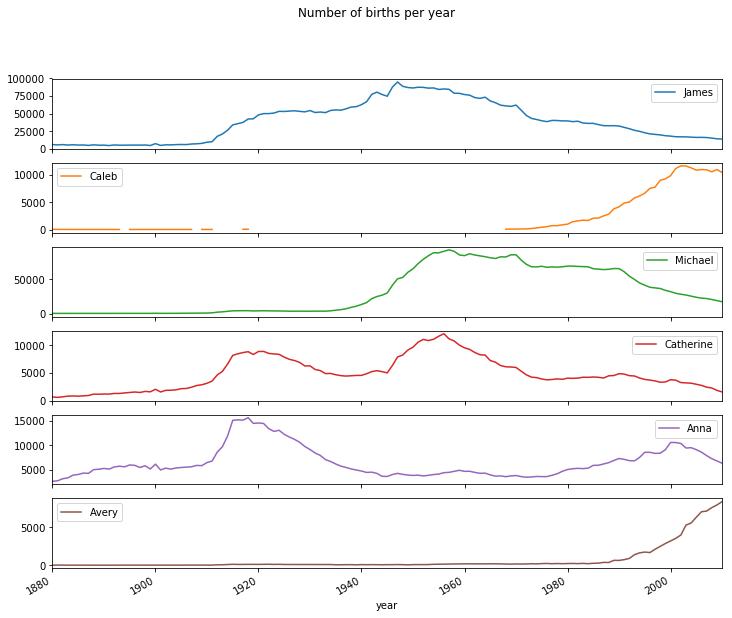

In [18]:
subset = total_births[['Caleb', 'Michael', 'Catherine', 'Anna', 'Avery']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")